In [18]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [19]:
!ls

gdrive	sample_data


In [20]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU, SimpleRNN
from keras.optimizers import RMSprop
import timeit

# data = np.load("polution_dataSet.npy")
# np.savetxt("polution_dataSet.csv", data, delimiter=",")
data = pd.read_csv("/content/gdrive/MyDrive/polution_dataSet.csv")
data = np.array(data)

train = data[:12000, ]
test = data[12000:15000, ]


def data_for_training(data_s1, period1):
    a1 = np.arange(len(data_s1) - period1 + 1)
    data_list1 = []
    for i in range(len(a1)):
        sample_list = []
        for j in range(period1):
            value1 = data_s1[i + j]
            sample_list.append(value1)
        data_list1.append(sample_list)
        i = i + 11
    data_list1 = np.array(data_list1)
    return data_list1


window = 11

x_train = data_for_training(train, window)
x_train = np.array(x_train)
# print(x_train.shape)
y_train = np.zeros((len(x_train), 2))
for i in range(len(x_train) - 2):
    value1 = x_train[i + 1][0][0]
    value2 = x_train[i + 2][1][0]
    y_train[i][0] = value1
    y_train[i][1] = value2

x_train = x_train[:, :11, :]

x_test = data_for_training(test, window)
x_test = np.array(x_test)
y_test = np.zeros((len(x_test), 2))
for i in range(len(x_test) - 2):
    value1 = x_test[i + 1][0][0]
    value2 = x_test[i + 2][1][0]
    y_test[i][0] = value1
    y_test[i][1] = value2
x_test = x_test[:, :11, :]

''' Build model rnn'''
rnn = Sequential()
rnn.add(SimpleRNN(units=50, input_shape=x_train.shape[1:], activation="relu", recurrent_dropout=0.0))
rnn.add(Dense(2, activation='relu'))
rnn.compile(loss='mse', optimizer='adagrad', metrics=['mae'])
rnn.summary()

''' Training rnn '''
start_rnn = timeit.default_timer()
history_rnn = rnn.fit(x_train, y_train, epochs=30, validation_split=0.2, verbose=1, batch_size=30)
end_rnn = timeit.default_timer()
''' Results rnn'''
results_train_rnn = rnn.evaluate(x_train, y_train)
results_test_rnn = rnn.evaluate(x_test, y_test)

print("RNN-adagrad-MSE : ")
print('train loss: {}'.format(results_train_rnn[0]))
print('test loss: {}'.format(results_test_rnn[0]))

''' Build model lstm '''
lstm = Sequential()
lstm.add(LSTM(50, batch_input_shape=(None, 11, 8), return_sequences=True, recurrent_dropout=0))
lstm.add(LSTM(50, return_sequences=False, recurrent_dropout=0))
lstm.add(Dense(2, activation='relu'))
lstm.compile(loss='mse', optimizer='adagrad', metrics=['mae'])
lstm.summary()

''' Training lstm '''
start_lstm = timeit.default_timer()
history_lstm = lstm.fit(x_train, y_train, epochs=30, validation_split=0.2, verbose=1, batch_size=30)
end_lstm = timeit.default_timer()
''' Results lstm'''
results_train_lstm = lstm.evaluate(x_train, y_train)
results_test_lstm = lstm.evaluate(x_test, y_test)
print("LSTM-adagrad-MSE Loss : ")
print('train loss: {}'.format(results_train_lstm[0]))
print('test loss: {}'.format(results_test_lstm[0]))

''' Build model gru'''
gru = Sequential()
gru.add(GRU(100, batch_input_shape=(None, 11, 8), recurrent_dropout=0))
gru.add(Dense(2, activation='relu'))
gru.compile(loss='mse', optimizer='adagrad', metrics=['mae'])
gru.summary()

''' Training gru'''
start_gru = timeit.default_timer()
history_gru = gru.fit(x_train, y_train, epochs=30, validation_split=0.2, verbose=1, batch_size=30)
end_gru = timeit.default_timer()
''' Results gru'''
results_train_gru = gru.evaluate(x_train, y_train)
results_test_gru = gru.evaluate(x_test, y_test)
print("GRU-adagrad-MSE Loss : ")
print('train loss: {}'.format(results_train_gru[0]))
print('test loss: {}'.format(results_test_gru[0]))

# plt.plot(history_rnn.history['loss'], label='rnn')
# plt.plot(history_lstm.history['loss'], label='lstm')
# plt.plot(history_gru.history['loss'], label='gru')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Train Loss')
# plt.legend()
# plt.show()
#
# plt.plot(history_rnn.history['val_loss'], label='rnn')
# plt.plot(history_lstm.history['val_loss'], label='lstm')
# plt.plot(history_gru.history['val_loss'], label='gru')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Test Loss')
# plt.legend()
# plt.show()
#
# results_test_rnn = rnn.predict(x_test)
# plt.plot(np.arange(len(results_test_rnn)), y_test[:, 0], label='True label Pollution @ 12')
# plt.plot(np.arange(len(results_test_rnn)), results_test_rnn[:, 0], label='predicted Pollution @ 12')
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())
# plt.xlabel('Time in test (hour)')
# plt.ylabel('Output value (pollution)')
# plt.title('Predicted vs. True label RNN')
# plt.show()
# plt.plot(np.arange(len(results_test_rnn)), y_test[:, 1], label='True label Pollution @ 24')
# plt.plot(np.arange(len(results_test_rnn)), results_test_rnn[:, 1], label='predicted Pollution @ 24')
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())
# plt.xlabel('Time in test (hour)')
# plt.ylabel('Output value (pollution)')
# plt.title('Predicted vs. True label RNN')
# plt.show()
#
# results_test_lstm = lstm.predict(x_test)
# plt.plot(np.arange(len(results_test_lstm)), y_test[:, 0], label='True label Pollution @ 12')
# plt.plot(np.arange(len(results_test_lstm)), results_test_lstm[:, 0], label='predicted Pollution @ 12')
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())
# plt.xlabel('Time in test (hour)')
# plt.ylabel('Output value (pollution)')
# plt.title('Predicted vs. True label LSTM')
# plt.show()
# plt.plot(np.arange(len(results_test_lstm)), y_test[:, 1], label='True label Pollution @ 24')
# plt.plot(np.arange(len(results_test_lstm)), results_test_lstm[:, 1], label='predicted Pollution @ 24')
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())
# plt.xlabel('Time in test (hour)')
# plt.ylabel('Output value (pollution)')
# plt.title('Predicted vs. True label LSTM')
# plt.show()
#
# results_test_gru = gru.predict(x_test)
# plt.plot(np.arange(len(results_test_gru)), y_test[:, 0], label='True label Pollution @ 12')
# plt.plot(np.arange(len(results_test_gru)), results_test_gru[:, 0], label='predicted Pollution @ 12')
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())
# plt.xlabel('Time in test (hour)')
# plt.ylabel('Output value (pollution)')
# plt.title('Predicted vs. True label GRU')
# plt.show()
# plt.plot(np.arange(len(results_test_gru)), y_test[:, 1], label='True label Pollution @ 24')
# plt.plot(np.arange(len(results_test_gru)), results_test_gru[:, 1], label='predicted Pollution @ 24')
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())
# plt.xlabel('Time in test (hour)')
# plt.ylabel('Output value (pollution)')
# plt.title('Predicted vs. True label GRU')
# plt.show()
#
# plt.plot(history_rnn.history['loss'], label='train loss')
# plt.plot(history_rnn.history['val_loss'], label='valid loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Train vs. Valid Loss for RNN')
# plt.legend()
# plt.show()
# plt.plot(history_lstm.history['loss'], label='train loss')
# plt.plot(history_lstm.history['val_loss'], label='valid loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Train vs. Valid Loss for LSTM')
# plt.legend()
# plt.show()
# plt.plot(history_gru.history['loss'], label='train loss')
# plt.plot(history_gru.history['val_loss'], label='valid loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Train vs. Valid Loss for GRU')
# plt.legend()
# plt.show()

print('learning time for RNN-adagrad-MSE : ', end_rnn - start_rnn)
print('learning time for LSTM-adagrad-MSE : ', end_lstm - start_lstm)
print('learning time for GRU-adagrad-MSE : ', end_gru - start_gru)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50)                2950      
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 3052 (11.92 KB)
Trainable params: 3052 (11.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
320/320 [==============================] - 2s 3ms/step - loss: 0.0134 - mae: 0.0827 - val_loss: 0.0133 - val_mae: 0.0778
Epoch 2/30
320/320 [==============================] - 1s 2ms/step - loss: 0.0110 - mae: 0.0765 - val_loss: 0.0122 - val_mae: 0.0776
Epoch 3/30
320/320 [==============================] - 1s 2ms/step - loss: 0.0102 - mae: 0.0737 - val_loss: 0.0116 - val_mae: 0.0757
Epoch 4/30
320/320 [

(81, 3, 8)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 50)                2950      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3001 (11.72 KB)
Trainable params: 3001 (11.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
5/5 [==============================] - 1s 52ms/step - loss: 0.0143 - mae: 0.0913 - val_loss: 0.0172 - val_mae: 0.1028
Epoch 2/20
5/5 [==============================] - 0s 7ms/step - loss: 0.0140 - mae: 0.0900 - val_loss: 0.0164 - val_mae: 0.0998
Epoch 3/20
5/5 [==============================] - 0s 6ms/step - loss: 0.0140 - mae: 0.0901 - val_loss: 0.0152 - val_mae: 0.0954
Epoch 4/20
5/5 [====

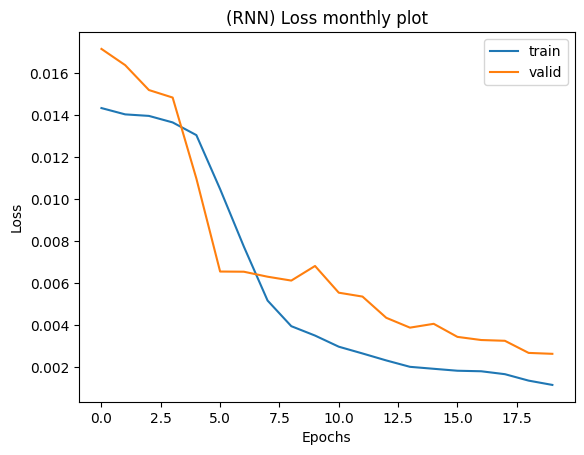

3/3 [==============================] - 0s 3ms/step


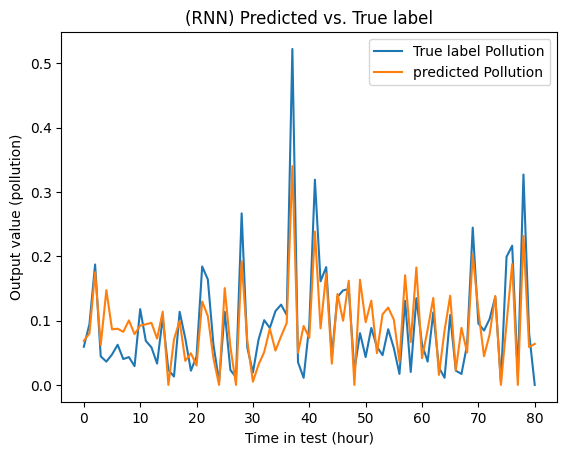

3/3 [==============================] - 0s 4ms/step - loss: 0.0023 - mae: 0.0372


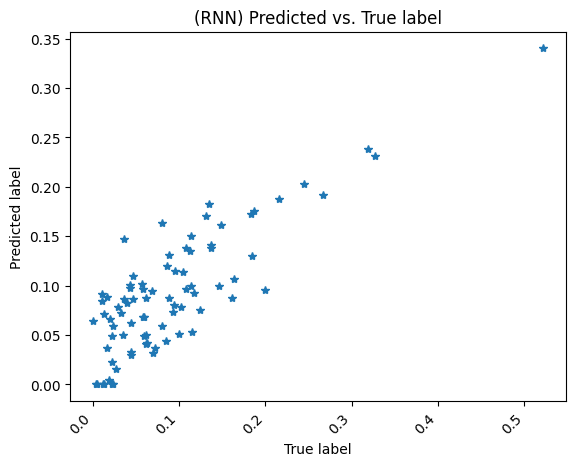

In [21]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, GRU, SimpleRNN, Dense
import matplotlib.pyplot as plt
from random import randrange
import timeit

data = pd.read_csv("/content/gdrive/MyDrive/polution_dataSet.csv")
data = np.array(data)
train = data[:30000, ]
test = data[30000:, ]

train_monthly = []
test_monthly = []

hour = randrange(0, 23)
day = randrange(0, 6)
a = 0
a = (day * 24) + hour
while a < 30000:
    train_monthly.append(train[a])
    a = a + (7 * 24)

a = 0
a = (day * 24) + hour
while a < 13799:
    test_monthly.append(test[a])
    a = a + (7 * 24)


def data_for_training(data_s1, period1):
    a1 = np.arange(len(data_s1) - period1 + 1)
    data_list1 = []
    for i in range(len(a1)):
        sample_list = []
        for j in range(period1):
            value1 = data_s1[i + j]
            sample_list.append(value1)
        data_list1.append(sample_list)
        i = i + 3
    data_list1 = np.array(data_list1)
    return data_list1


window = 3

x_train = data_for_training(train_monthly, window)
x_train = np.array(x_train)
y_train = np.zeros((len(x_train), 1))
for i in range(len(x_train) - 1):
    value1 = x_train[i + 1][0][0]
    y_train[i] = value1

x_train = x_train[:, :3, :]

x_test = data_for_training(test_monthly, window)
print(x_test.shape)
x_test = np.array(x_test)
y_test = np.zeros((len(x_test), 1))
for i in range(len(x_test) - 1):
    value1 = x_test[i + 1][0][0]
    y_test[i] = value1
x_test = x_test[:, :3, :]

''' Build model '''
model = Sequential()
model.add(SimpleRNN(units=50, input_shape=x_train.shape[1:], activation="relu", recurrent_dropout=0.0))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse', optimizer='ADam', metrics=['mae'])
model.summary()

''' Training '''
start = timeit.default_timer()
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2, verbose=1, batch_size=30)
end = timeit.default_timer()
''' Results '''
results_train = model.evaluate(x_train, y_train)
results_test = model.evaluate(x_test, y_test)

print('RNN monthly loss : ')
print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))
print('monthly learning time for RNN : ', end - start)

plt.plot(history.history['loss'], label='train')
plt.title('(RNN) Loss monthly plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['val_loss'], label='valid')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

results_test = model.predict(x_test)

plt.plot(np.arange(len(results_test)), y_test[:, 0], label='True label Pollution')
plt.plot(np.arange(len(results_test)), results_test[:, 0], label='predicted Pollution')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xlabel('Time in test (hour)')
plt.ylabel('Output value (pollution)')
plt.title('(RNN) Predicted vs. True label')
plt.show()

results = model.evaluate(x_test, y_test)
plt.plot(y_test, results_test, '*')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('(RNN) Predicted vs. True label')
plt.xticks(rotation=45, ha='right')
plt.show()




[array([0.07847082, 0.83823532, 0.60655737, 0.36363602, 0.66666669,
       0.00458002, 0.        , 0.22222222]), array([0.16700201, 0.83823532, 0.60655737, 0.36363602, 0.66666669,
       0.01069811, 0.        , 0.        ]), array([0.14889336, 0.86764705, 0.65573764, 0.29090881, 0.66666669,
       0.00229001, 0.        , 0.        ]), array([1.34808853e-01, 8.67647052e-01, 6.39344215e-01, 2.90908813e-01,
       3.33333343e-01, 7.51943968e-04, 0.00000000e+00, 0.00000000e+00]), array([0.13078471, 0.86764705, 0.63934422, 0.29090881, 1.        ,
       0.00227292, 0.        , 0.        ]), array([2.81690136e-02, 8.08823586e-01, 5.73770463e-01, 3.99999619e-01,
       0.00000000e+00, 7.51943968e-04, 0.00000000e+00, 0.00000000e+00]), array([6.23742417e-02, 8.23529422e-01, 5.90163946e-01, 3.27272415e-01,
       1.00000000e+00, 7.51943968e-04, 0.00000000e+00, 0.00000000e+00]), array([0.0472837 , 0.7647059 , 0.54098356, 0.30909157, 1.        ,
       0.00304196, 0.        , 0.        ]), array([

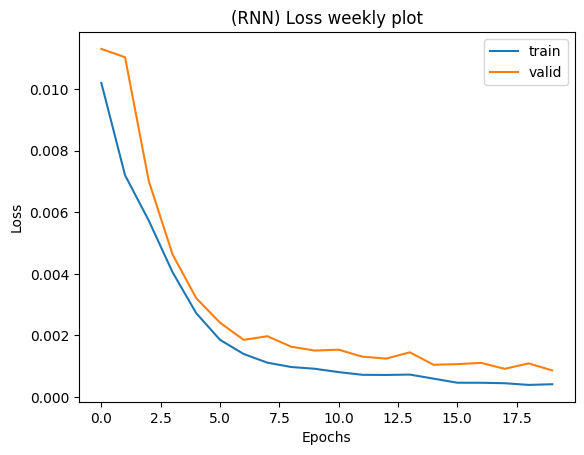

18/18 [==============================] - 0s 1ms/step


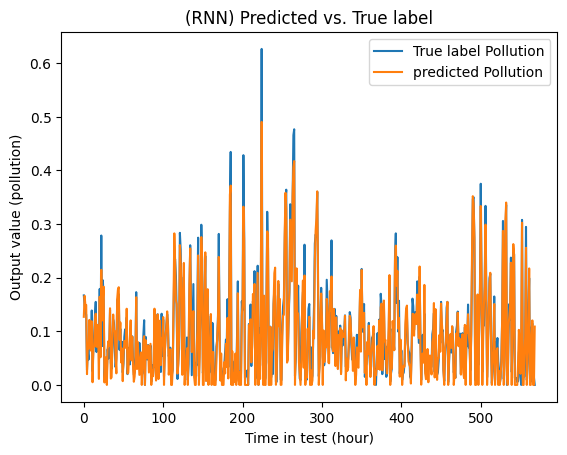

18/18 [==============================] - 0s 1ms/step - loss: 5.8417e-04 - mae: 0.0180


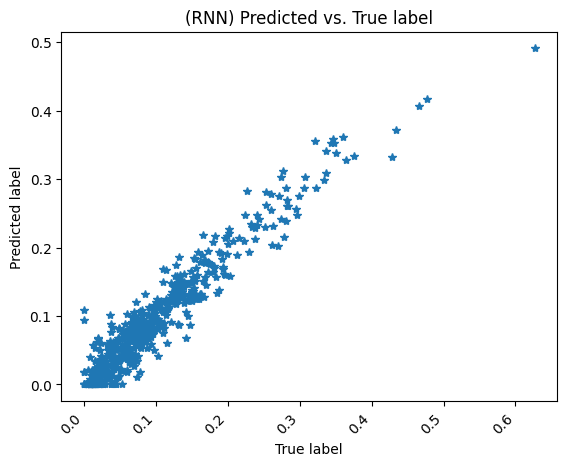

In [22]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, GRU, SimpleRNN, Dense
import matplotlib.pyplot as plt
from random import randrange
import timeit

data = pd.read_csv("/content/gdrive/MyDrive/polution_dataSet.csv")
data = np.array(data)

train = data[:30000, ]
test = data[30000:, ]

train_weekly = []
test_weekly = []

hour = randrange(0, 23)
h1 = 0
h2 = 0
while h1 + 23 < 30000:
    train_weekly.append(train[hour + h1])
    h1 += 24

while h2 + 23 < 13799:
    test_weekly.append(test[hour + h2])
    h2 += 24

print(test_weekly)


def data_for_training(data_s1, period1):
    a1 = np.arange(len(data_s1) - period1 + 1)
    data_list1 = []
    for i in range(len(a1)):
        sample_list = []
        for j in range(period1):
            value1 = data_s1[i + j]
            sample_list.append(value1)
        data_list1.append(sample_list)
        i = i + 6
    data_list1 = np.array(data_list1)
    return data_list1


window = 6

x_train = data_for_training(train_weekly, window)
x_train = np.array(x_train)
y_train = np.zeros((len(x_train), 1))
for i in range(len(x_train) - 1):
    value1 = x_train[i + 1][0][0]
    y_train[i] = value1

x_train = x_train[:, :6, :]

x_test = data_for_training(test_weekly, window)
print(x_test.shape)
x_test = np.array(x_test)
y_test = np.zeros((len(x_test), 1))
for i in range(len(x_test) - 1):
    value1 = x_test[i + 1][0][0]
    y_test[i] = value1
x_test = x_test[:, :6, :]

''' Build model '''
model = Sequential()
model.add(SimpleRNN(units=50, input_shape=x_train.shape[1:], activation="relu", recurrent_dropout=0.0))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

''' Training '''
start = timeit.default_timer()
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2, verbose=1, batch_size=30)
end = timeit.default_timer()
''' Results '''
results_train = model.evaluate(x_train, y_train)

results_test = model.evaluate(x_test, y_test)

print('RNN weekly loss : ')
print('train loss: {}, train acc: {}'.format(results_train[0], results_train[1]))
print('test loss: {}, test acc: {}'.format(results_test[0], results_test[1]))
print('weekly learning time for RNN : ', end - start)


plt.plot(history.history['loss'], label='train')
plt.title('(RNN) Loss weekly plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['val_loss'], label='valid')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

results_test = model.predict(x_test)

plt.plot(np.arange(len(results_test)), y_test[:, 0], label='True label Pollution')
plt.plot(np.arange(len(results_test)), results_test[:, 0], label='predicted Pollution')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xlabel('Time in test (hour)')
plt.ylabel('Output value (pollution)')
plt.title('(RNN) Predicted vs. True label')
plt.show()

results = model.evaluate(x_test, y_test)
plt.plot(y_test, results_test, '*')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('(RNN) Predicted vs. True label')
plt.xticks(rotation=45, ha='right')
plt.show()




Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 11, 50)            11800     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_6 (Dense)             (None, 2)                 102       
                                                                 
Total params: 32102 (125.40 KB)
Trainable params: 32102 (125.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
320/320 [==============================] - 7s 14ms/step - loss: 0.0053 - mae: 0.0396 - val_loss: 5.3683e-04 - val_mae: 0.0150
Epoch 2/30
320/320 [==============================] - 3s 8ms/step - loss: 5.5811e-04 - mae: 0.0138 - val_loss: 4.8027e-04 - val_mae: 0.0134
Epo

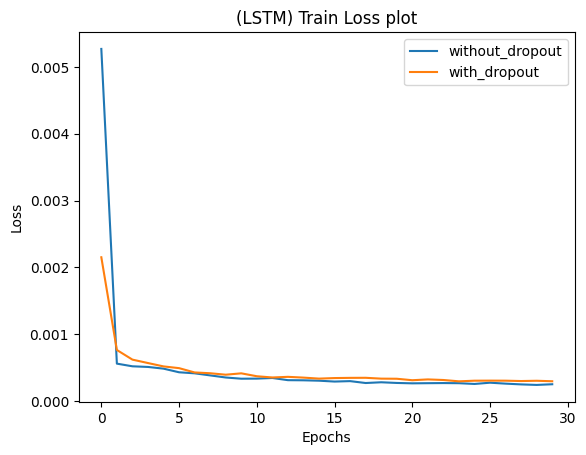

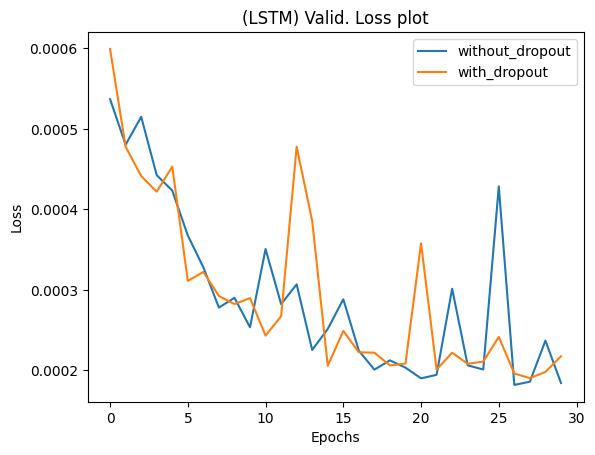

94/94 [==============================] - 1s 3ms/step


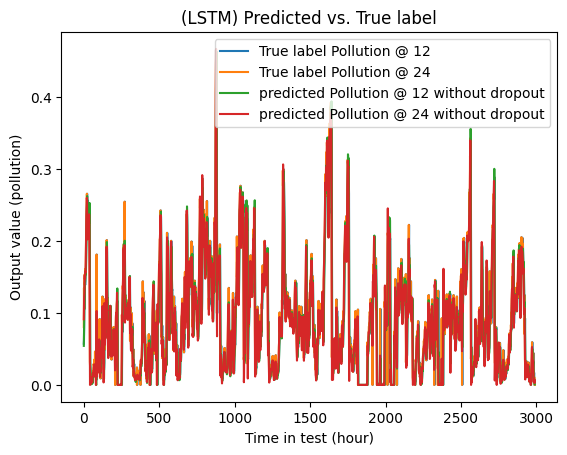

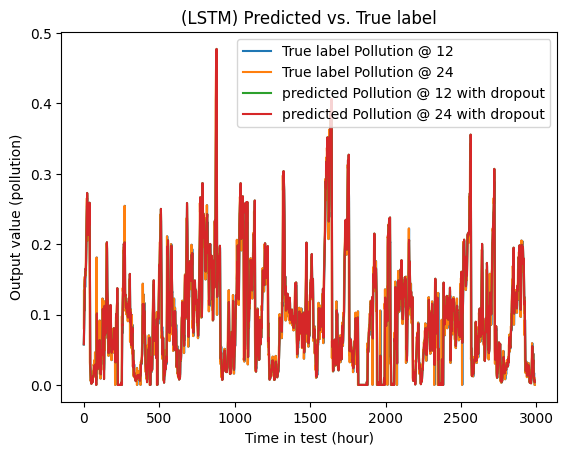

In [23]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM, GRU, SimpleRNN
from keras.optimizers import RMSprop

# data = np.load("polution_dataSet.npy")
# np.savetxt("polution_dataSet.csv", data, delimiter=",")
data = pd.read_csv("/content/gdrive/MyDrive/polution_dataSet.csv")
data = np.array(data)

train = data[:12000, ]
test = data[12000:15000, ]


def data_for_training(data_s1, period1):
    a1 = np.arange(len(data_s1) - period1 + 1)
    data_list1 = []
    for i in range(len(a1)):
        sample_list = []
        for j in range(period1):
            value1 = data_s1[i + j]
            sample_list.append(value1)
        data_list1.append(sample_list)
        i = i + 11
    data_list1 = np.array(data_list1)
    return data_list1


window = 11

x_train = data_for_training(train, window)
x_train = np.array(x_train)
y_train = np.zeros((len(x_train), 2))
for i in range(len(x_train) - 2):
    value1 = x_train[i + 1][0][0]
    value2 = x_train[i + 2][1][0]
    y_train[i][0] = value1
    y_train[i][1] = value2

x_train = x_train[:, :11, :]

x_test = data_for_training(test, window)
x_test = np.array(x_test)
y_test = np.zeros((len(x_test), 2))
for i in range(len(x_test) - 2):
    value1 = x_test[i + 1][0][0]
    value2 = x_test[i + 2][1][0]
    y_test[i][0] = value1
    y_test[i][1] = value2
x_test = x_test[:, :11, :]

''' Build model '''
lstm_without_dropout = Sequential()
lstm_without_dropout.add(LSTM(50, batch_input_shape=(None, 11, 8), return_sequences=True))
lstm_without_dropout.add(LSTM(50, return_sequences=False))
lstm_without_dropout.add(Dense(2, activation='relu'))
lstm_without_dropout.compile(loss='mse', optimizer='adam', metrics=['mae'])
lstm_without_dropout.summary()

''' Training '''
history_without_dropout = lstm_without_dropout.fit(x_train, y_train, epochs=30, validation_split=0.2, verbose=1,
                                                   batch_size=30)

''' Results '''
results_train_without_dropout = lstm_without_dropout.evaluate(x_train, y_train)
results_test_without_dropout = lstm_without_dropout.evaluate(x_test, y_test)
print('LSTM without dropout')
print('train loss: {}'.format(results_train_without_dropout[0]))
print('test loss: {}'.format(results_test_without_dropout[0]))

''' Build model '''
lstm_with_dropout = Sequential()
lstm_with_dropout.add(LSTM(50, batch_input_shape=(None, 11, 8), return_sequences=True))
lstm_with_dropout.add(Dropout(0.1))
lstm_with_dropout.add(LSTM(50, return_sequences=False))
lstm_with_dropout.add(Dropout(0.1))
lstm_with_dropout.add(Dense(2, activation='relu'))
lstm_with_dropout.compile(loss='mse', optimizer='adam', metrics=['mae'])
lstm_with_dropout.summary()

''' Training '''
history_with_dropout = lstm_with_dropout.fit(x_train, y_train, epochs=30, validation_split=0.2, verbose=1,
                                             batch_size=30)

''' Results '''
results_train_with_dropout = lstm_with_dropout.evaluate(x_train, y_train)
results_test_with_dropout = lstm_with_dropout.evaluate(x_test, y_test)
print('LSTM with dropout')
print('train loss: {}'.format(results_train_with_dropout[0]))
print('test loss: {}'.format(results_test_with_dropout[0]))

''''''''''''''' loss plot '''''''''''''''''

plt.plot(history_without_dropout.history['loss'], label='without_dropout')
plt.title('(LSTM) Train Loss plot')
plt.plot(history_with_dropout.history['loss'], label='with_dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(history_without_dropout.history['val_loss'], label='without_dropout')
plt.title('(LSTM) Valid. Loss plot')
plt.plot(history_with_dropout.history['val_loss'], label='with_dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

results_test_without_dropout = lstm_without_dropout.predict(x_test)
results_test_with_dropout = lstm_with_dropout.predict(x_test)

plt.plot(np.arange(len(results_test_without_dropout)), y_test[:, 0], label='True label Pollution @ 12')
plt.plot(np.arange(len(results_test_without_dropout)), y_test[:, 1], label='True label Pollution @ 24')
plt.plot(np.arange(len(results_test_without_dropout)), results_test_without_dropout[:, 0],
         label='predicted Pollution @ 12 without dropout')
plt.plot(np.arange(len(results_test_without_dropout)), results_test_without_dropout[:, 1],
         label='predicted Pollution @ 24 without dropout')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xlabel('Time in test (hour)')
plt.ylabel('Output value (pollution)')
plt.title('(LSTM) Predicted vs. True label')
plt.show()
plt.plot(np.arange(len(results_test_without_dropout)), y_test[:, 0], label='True label Pollution @ 12')
plt.plot(np.arange(len(results_test_without_dropout)), y_test[:, 1], label='True label Pollution @ 24')
plt.plot(np.arange(len(results_test_with_dropout)), results_test_with_dropout[:, 0],
         label='predicted Pollution @ 12 with dropout')
plt.plot(np.arange(len(results_test_with_dropout)), results_test_with_dropout[:, 0],
         label='predicted Pollution @ 24 with dropout')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel('Time in test (hour)')
plt.ylabel('Output value (pollution)')
plt.title('(LSTM) Predicted vs. True label')
plt.show()


(29388, 11, 8) (29388, 6, 8) (29388, 3, 8) (29388,)
Epoch 1/30
784/784 [==============================] - 10s 8ms/step - loss: 0.0017 - mae: 0.0255 - val_loss: 0.0011 - val_mae: 0.0174
Epoch 2/30
784/784 [==============================] - 6s 8ms/step - loss: 8.2594e-04 - mae: 0.0158 - val_loss: 0.0011 - val_mae: 0.0171
Epoch 3/30
784/784 [==============================] - 5s 7ms/step - loss: 7.8978e-04 - mae: 0.0153 - val_loss: 0.0011 - val_mae: 0.0157
Epoch 4/30
784/784 [==============================] - 6s 8ms/step - loss: 7.7904e-04 - mae: 0.0149 - val_loss: 0.0010 - val_mae: 0.0150
Epoch 5/30
784/784 [==============================] - 5s 7ms/step - loss: 7.7512e-04 - mae: 0.0149 - val_loss: 0.0010 - val_mae: 0.0152
Epoch 6/30
784/784 [==============================] - 7s 9ms/step - loss: 7.7165e-04 - mae: 0.0148 - val_loss: 0.0011 - val_mae: 0.0146
Epoch 7/30
784/784 [==============================] - 6s 7ms/step - loss: 7.6814e-04 - mae: 0.0149 - val_loss: 0.0011 - val_mae: 0.0163

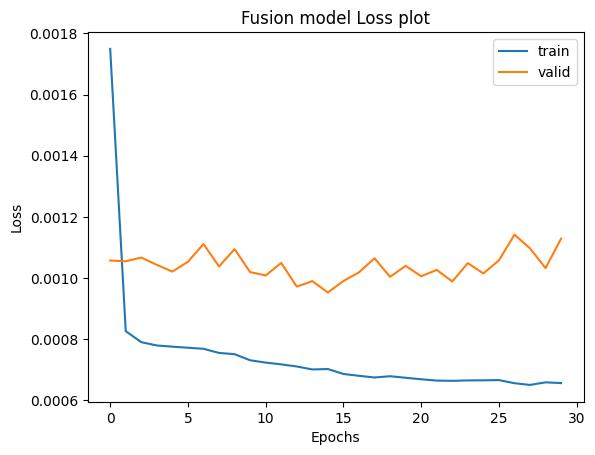

(13278, 11, 8) (13278, 6, 8) (13278, 3, 8) (13278,)
415/415 [==============================] - 1s 2ms/step - loss: 5.6219e-04 - mae: 0.0143
test loss: 0.0005621883319690824
415/415 [==============================] - 1s 2ms/step


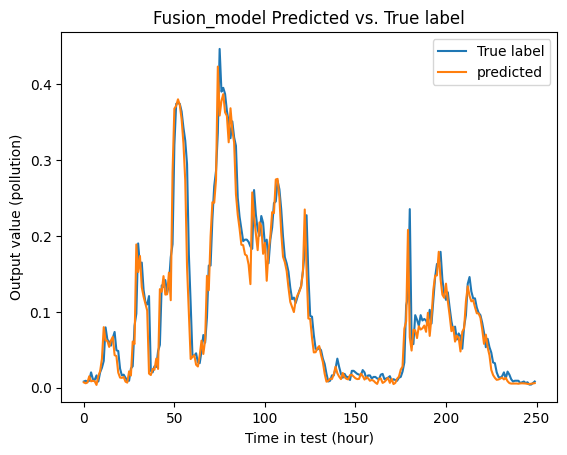

In [24]:
import numpy as np
import pandas as pd
import keras
from keras.layers import Dense
from sklearn import preprocessing
from keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from keras.models import Sequential, Model
from keras.layers import LSTM, GRU, SimpleRNN
from keras.optimizers import RMSprop
from random import randrange

# data = np.load("polution_dataSet.npy")
# np.savetxt("polution_dataSet.csv", data, delimiter=",")
data = pd.read_csv("/content/gdrive/MyDrive/polution_dataSet.csv")
data = np.array(data)
# print(np.shape(dataset))

train = data[:30000, ]
test = data[30000:, ]

train_daily = []
train_weekly = []
train_monthly = []
train_targets = []


def gen_train_data(train, stride):
    hour = randrange(0, 23)
    day = randrange(0, 6)
    target = train[(-(6 - day) * 24) + hour][0]
    target_index = (-(6 - day) * 24) + hour
    while target_index != -len(train) + 24 * 7 * 3:
        target = train[target_index - stride][0]
        train_targets.append(target)
        target_index = target_index - stride
        train_daily.append(train[target_index - 11:target_index])
        weekly = []
        for i in range(1, 7):
            weekly.append(train[target_index - 24 * i])
        train_weekly.append(weekly)
        monthly = []
        for j in range(1, 4):
            monthly.append(train[target_index - 24 * 7 * j])
        train_monthly.append(monthly)

    return train_daily, train_weekly, train_monthly, train_targets


input1, input2, input3, output = gen_train_data(train, 1)

input1 = np.array(input1)
input2 = np.array(input2)
input3 = np.array(input3)
output = np.array(output)
print(input1.shape, input2.shape, input3.shape, output.shape)
x_train = [input1, input2, input3]
y_train = output

''' Build model1 '''
model1 = keras.layers.Input(shape=(11, 8))
x1 = keras.layers.GRU(50)(model1)
x_1 = keras.layers.Dense(8, activation='relu')(x1)

''' Build model2 '''
model2 = keras.layers.Input(shape=(6, 8))
x2 = keras.layers.GRU(50)(model2)
x_2 = keras.layers.Dense(8, activation='relu')(x2)

''' Build model3 '''
model3 = keras.layers.Input(shape=(3, 8))
x3 = keras.layers.GRU(50)(model3)
x_3 = keras.layers.Dense(8, activation='relu')(x3)

''' Build fusion model '''
avg = keras.layers.Average()([x_1, x_2, x_3])
out = keras.layers.Dense(1)(avg)
fusion_model = keras.models.Model(inputs=[model1, model2, model3], outputs=out)

''' Training model '''
fusion_model.compile(loss='mse', optimizer='adam', metrics=['mae'])
history = fusion_model.fit(x_train, y_train, epochs=30, validation_split=0.2, verbose=1, batch_size=30)
''' Results model'''
results_train = fusion_model.evaluate(x_train, y_train)
print('train loss: {}'.format(results_train[0]))

plt.plot(history.history['loss'], label='train')
plt.title('Fusion model Loss plot')
plt.plot(history.history['val_loss'], label='valid')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_daily = []
test_weekly = []
test_monthly = []
test_targets = []


def gen_test_data(test, stride):
    hour = randrange(0, 23)
    day = randrange(0, 6)
    target = test[(-(6 - day) * 24) + hour][0]
    target_index = (-(6 - day) * 24) + hour
    while target_index != -len(test) + 24 * 7 * 3:
        target = test[target_index - stride][0]
        test_targets.append(target)
        target_index = target_index - stride
        test_daily.append(test[target_index - 11:target_index])
        weekly = []
        for i in range(1, 7):
            weekly.append(test[target_index - 24 * i])
        test_weekly.append(weekly)
        monthly = []
        for j in range(1, 4):
            monthly.append(test[target_index - 24 * 7 * j])
        test_monthly.append(monthly)

    return test_daily, test_weekly, test_monthly, test_targets


test_input1, test_input2, test_input3, test_output = gen_test_data(test, 1)

test_input1 = np.array(test_input1)
test_input2 = np.array(test_input2)
test_input3 = np.array(test_input3)
test_output = np.array(test_output)
print(test_input1.shape, test_input2.shape, test_input3.shape, test_output.shape)
x_test = [test_input1, test_input2, test_input3]
y_test = test_output

results_test = fusion_model.evaluate(x_test, y_test)
print('test loss: {}'.format(results_test[0]))

results_test = fusion_model.predict(x_test)

plt.plot(np.arange(250), y_test[:250], label='True label')
plt.plot(np.arange(250), results_test[:250], label='predicted')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel('Time in test (hour)')
plt.ylabel('Output value (pollution)')
plt.title('Fusion_model Predicted vs. True label')
plt.show()


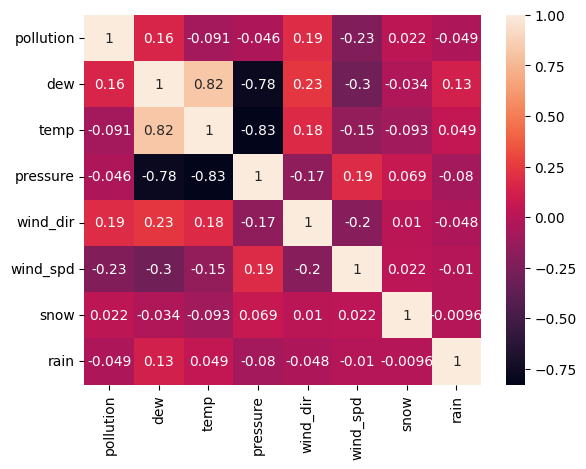

In [25]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = pd.read_csv("/content/gdrive/MyDrive/polution_dataSet1.csv")
df = pd.DataFrame(data, columns=['pollution', 'dew', 'temp', 'pressure', 'wind_dir', 'wind_spd', 'snow', 'rain'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()


(43798, 8)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 50)                2700      
                                                                 
 dense_12 (Dense)            (None, 2)                 102       
                                                                 
Total params: 2802 (10.95 KB)
Trainable params: 2802 (10.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
320/320 [==============================] - 1s 3ms/step - loss: 0.0030 - mae: 0.0363 - val_loss: 0.0012 - val_mae: 0.0243
Epoch 2/30
320/320 [==============================] - 1s 2ms/step - loss: 0.0012 - mae: 0.0232 - val_loss: 7.0923e-04 - val_mae: 0.0177
Epoch 3/30
320/320 [==============================] - 1s 3ms/step - loss: 9.4550e-04 - mae: 0.0201 - val_loss: 0.0012 - val_mae: 0.0268
E

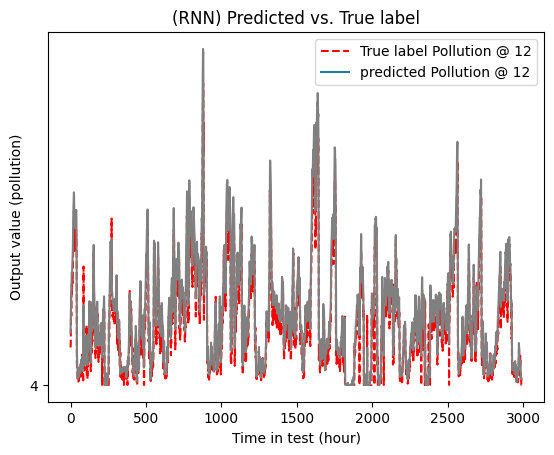

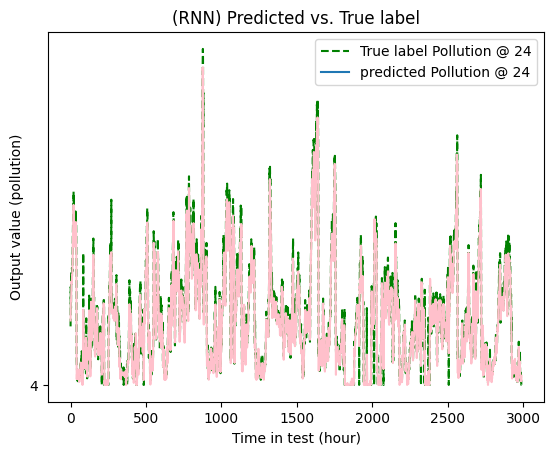

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 11, 50)            10800     
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_13 (Dense)            (None, 2)                 102       
                                                                 
Total params: 31102 (121.49 KB)
Trainable params: 31102 (121.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
320/320 [==============================] - 6s 11ms/step - loss: 0.0019 - mae: 0.0228 - val_loss: 4.7457e-04 - val_mae: 0.0134
Epoch 2/30
320/320 [==============================] - 3s 8ms/step - loss: 5.0619e-04 - mae: 0.0127 - val_loss: 4.2009e-04 - val_mae: 0.0120
Epo

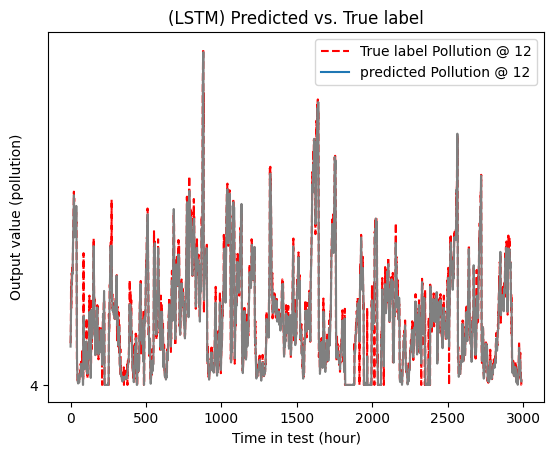

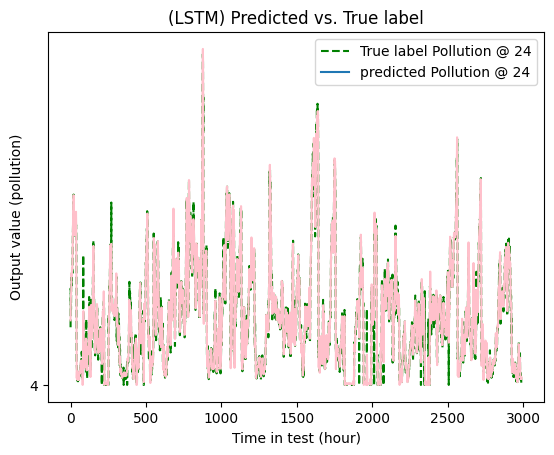

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 100)               31500     
                                                                 
 dense_14 (Dense)            (None, 2)                 202       
                                                                 
Total params: 31702 (123.84 KB)
Trainable params: 31702 (123.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
320/320 [==============================] - 3s 7ms/step - loss: 0.0032 - mae: 0.0372 - val_loss: 0.0015 - val_mae: 0.0253
Epoch 2/30
320/320 [==============================] - 2s 8ms/step - loss: 0.0013 - mae: 0.0235 - val_loss: 9.2432e-04 - val_mae: 0.0222
Epoch 3/30
320/320 [==============================] - 2s 7ms/step - loss: 9.2259e-04 - mae: 0.0199 - val_loss: 0.0011 - val_mae: 0.0243
Epoch 4

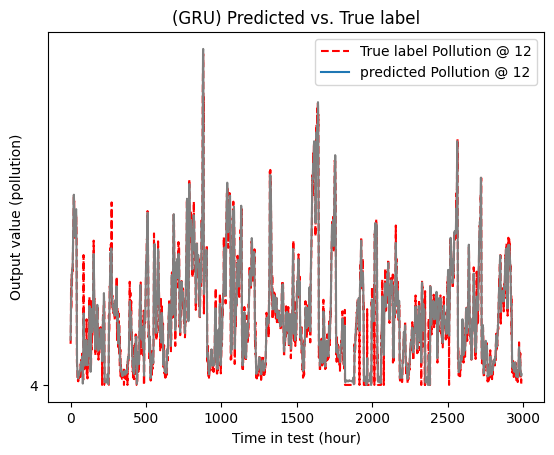

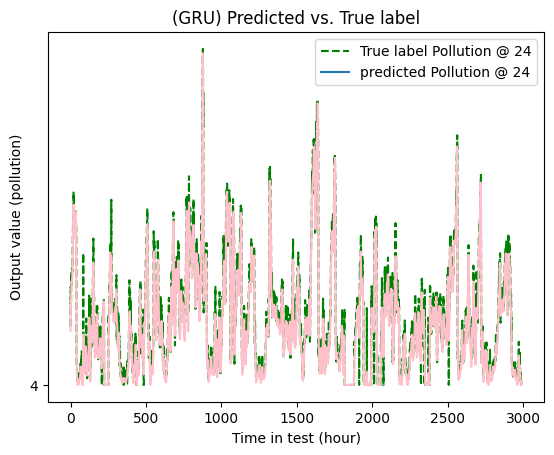

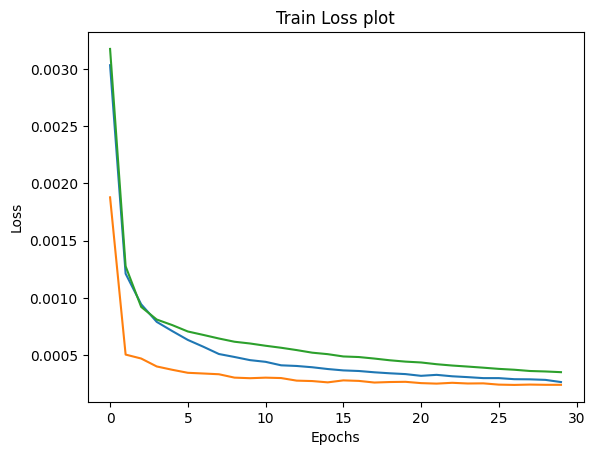

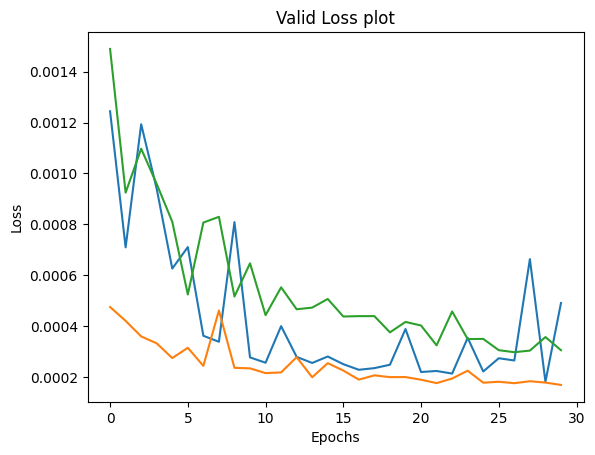

In [26]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU, SimpleRNN
from keras.optimizers import RMSprop

data = pd.read_csv("/content/gdrive/MyDrive/polution_dataSet.csv")
data = np.array(data)
print(data.shape)

new_dataset = np.zeros((43798, 3))

new_dataset[:, 0] = data[:, 0]
new_dataset[:, 1] = data[:, 4]
new_dataset[:, 2] = data[:, 5]

train = new_dataset[:12000, ]
test = new_dataset[12000:15000, ]


def data_for_training(data_s1, period1):
    a1 = np.arange(len(data_s1) - period1 + 1)
    data_list1 = []
    for i in range(len(a1)):
        sample_list = []
        for j in range(period1):
            value1 = data_s1[i + j]
            sample_list.append(value1)
        data_list1.append(sample_list)
        i = i + 11
    data_list1 = np.array(data_list1)
    return data_list1



window = 11

x_train = data_for_training(train, window)
x_train = np.array(x_train)
y_train = np.zeros((len(x_train), 2))
for i in range(len(x_train) - 2):
    value1 = x_train[i + 1][0][0]
    value2 = x_train[i + 2][1][0]
    y_train[i][0] = value1
    y_train[i][1] = value2

x_train = x_train[:, :11, :]


x_test = data_for_training(test, window)
x_test = np.array(x_test)
y_test = np.zeros((len(x_test), 2))
for i in range(len(x_test) - 2):
    value1 = x_test[i + 1][0][0]
    value2 = x_test[i + 2][1][0]
    y_test[i][0] = value1
    y_test[i][1] = value2
x_test = x_test[:, :11, :]

''' Build model rnn '''
rnn = Sequential()
rnn.add(SimpleRNN(units=50, input_shape=x_train.shape[1:], activation="relu", recurrent_dropout=0.0))
rnn.add(Dense(2, activation='relu'))
rnn.compile(loss='mse', optimizer='RMSprop', metrics=['mae'])
rnn.summary()
''' Training rnn '''
history_rnn = rnn.fit(x_train, y_train, epochs=30, validation_split=0.2, verbose=1, batch_size=30)

''' Results rnn '''

results_test = rnn.predict(x_test)
plt.plot(np.arange(len(results_test)), y_test[:, 0], 'r--', label='True label Pollution @ 12')
plt.plot(np.arange(len(results_test)), results_test[:, 0], 'grey', '4', label='predicted Pollution @ 12')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel('Time in test (hour)')
plt.ylabel('Output value (pollution)')
plt.title('(RNN) Predicted vs. True label')
plt.show()
plt.plot(np.arange(len(results_test)), y_test[:, 1], 'g--', label='True label Pollution @ 24')
plt.plot(np.arange(len(results_test)), results_test[:, 1], 'pink', '4', label='predicted Pollution @ 24')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel('Time in test (hour)')
plt.ylabel('Output value (pollution)')
plt.title('(RNN) Predicted vs. True label')
plt.show()

''' Build model lstm '''
lstm = Sequential()
lstm.add(LSTM(50, batch_input_shape=(None, 11, 3), return_sequences=True, recurrent_dropout=0))
lstm.add(LSTM(50, return_sequences=False, recurrent_dropout=0))
lstm.add(Dense(2, activation='relu'))
lstm.compile(loss='mse', optimizer='adam', metrics=['mae'])
lstm.summary()

''' Training lstm '''
history_lstm = lstm.fit(x_train, y_train, epochs=30, validation_split=0.2, verbose=1, batch_size=30)

''' Results lstm '''

results_test = lstm.predict(x_test)
plt.plot(np.arange(len(results_test)), y_test[:, 0], 'r--', label='True label Pollution @ 12')
plt.plot(np.arange(len(results_test)), results_test[:, 0], 'grey', '4', label='predicted Pollution @ 12')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel('Time in test (hour)')
plt.ylabel('Output value (pollution)')
plt.title('(LSTM) Predicted vs. True label')
plt.show()
plt.plot(np.arange(len(results_test)), y_test[:, 1], 'g--', label='True label Pollution @ 24')
plt.plot(np.arange(len(results_test)), results_test[:, 1], 'pink', '4', label='predicted Pollution @ 24')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel('Time in test (hour)')
plt.ylabel('Output value (pollution)')
plt.title('(LSTM) Predicted vs. True label')
plt.show()

''' Build model gru '''
gru = Sequential()
gru.add(GRU(100, batch_input_shape=(None, 11, 3), recurrent_dropout=0))
# model.add(GRU(50, batch_input_shape=(2234, 30, 12)))
gru.add(Dense(2, activation='relu'))
gru.compile(loss='mse', optimizer='RMSprop', metrics=['mae'])
gru.summary()

''' Training gru '''
history_gru = gru.fit(x_train, y_train, epochs=30, validation_split=0.2, verbose=1, batch_size=30)

''' Results '''



results_test = gru.predict(x_test)
plt.plot(np.arange(len(results_test)), y_test[:, 0], 'r--', label='True label Pollution @ 12')
plt.plot(np.arange(len(results_test)), results_test[:, 0], 'grey', '4', label='predicted Pollution @ 12')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel('Time in test (hour)')
plt.ylabel('Output value (pollution)')
plt.title('(GRU) Predicted vs. True label')
plt.show()
plt.plot(np.arange(len(results_test)), y_test[:, 1], 'g--', label='True label Pollution @ 24')
plt.plot(np.arange(len(results_test)), results_test[:, 1], 'pink', '4', label='predicted Pollution @ 24')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel('Time in test (hour)')
plt.ylabel('Output value (pollution)')
plt.title('(GRU) Predicted vs. True label')
plt.show()


plt.plot(history_rnn.history['loss'])
plt.plot(history_lstm.history['loss'])
plt.plot(history_gru.history['loss'])
plt.title('Train Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(history_rnn.history['val_loss'])
plt.plot(history_lstm.history['val_loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('Valid Loss plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [27]:
import numpy as np
import pandas as pd
import random
import math
from scipy.spatial import distance
import statistics
from sklearn.metrics import mean_squared_error

dataset = np.load('/content/gdrive/MyDrive/polution_dataSet.npy')
train = dataset[:12000, ]

column = 0
vector1 = []
vector2 = []
vector3 = []

vector_interpolate = []
for i in range(12000):
    vector1.append(train[i, column])
    vector2.append(train[i, column])
    vector3.append(train[i, column])
    vector_interpolate.append(train[i, column])
rand_list = random.sample(range(1, 12000), 2400)
for i in range(2400):
    vector2[rand_list[i]] = 0
    vector3[rand_list[i]] = 0
    vector_interpolate[rand_list[i]] = np.nan
#   interpolate
df = pd.DataFrame(vector_interpolate)
y_res = df.interpolate()

# mean and median
mean_vector2 = np.mean(vector2)
median_vector3 = statistics.median(vector2)

for i in range(12000):
    if vector2[i] == 0:
        vector2[i] = mean_vector2
    if vector3[i] == 0:
        vector3[i] = median_vector3

mse1 = mean_squared_error(vector1, vector2)
mse2 = mean_squared_error(vector1, vector3)
mse3 = mean_squared_error(vector1, y_res)

print("mse - mean : ", mse1)
print("mse - median : ", mse2)
print("mse - interpolation : ", mse3)

mse - mean :  0.0021448409176899256
mse - median :  0.0023701356318216594
mse - interpolation :  6.907297490091186e-05


mse - mean :  2.2819303493119235e-18
mse - median :  2.787872815949545e-17
Model: "sequential_11"
_________________________________________________________________


<ipython-input-28-8942a0c014f3>:112: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  train[:, 0] = d1
<ipython-input-28-8942a0c014f3>:113: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  train[:, 1] = d2
<ipython-input-28-8942a0c014f3>:114: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]

 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 50)                2950      
                                                                 
 dense_15 (Dense)            (None, 2)                 102       
                                                                 
Total params: 3052 (11.92 KB)
Trainable params: 3052 (11.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
320/320 [==============================] - 2s 3ms/step - loss: 0.0066 - mae: 0.0546 - val_loss: 0.0025 - val_mae: 0.0359
Epoch 2/30
320/320 [==============================] - 1s 2ms/step - loss: 0.0021 - mae: 0.0321 - val_loss: 0.0012 - val_mae: 0.0253
Epoch 3/30
320/320 [==============================] - 1s 3ms/step - loss: 0.0013 - mae: 0.0258 - val_loss: 0.0011 - val_mae: 0.0254
Epoch 4/30
320/320 [==============================] - 1s 2ms/step - loss: 0.0011 - mae: 0.0229 - val_loss: 0

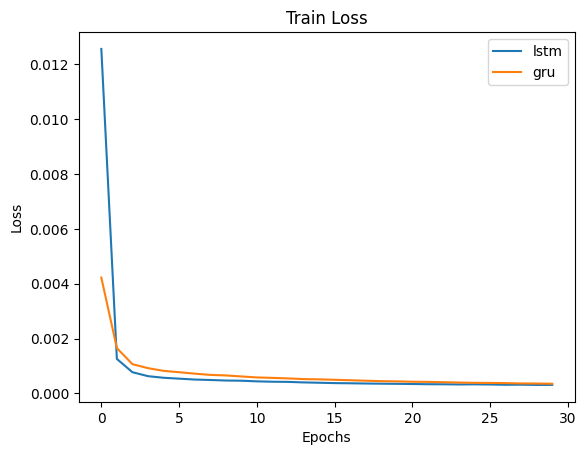

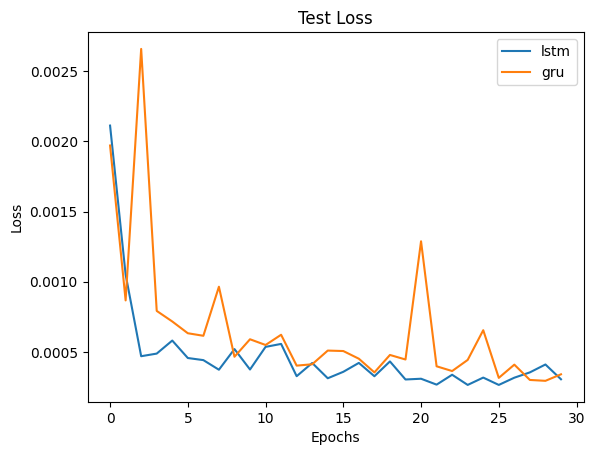

94/94 [==============================] - 0s 2ms/step


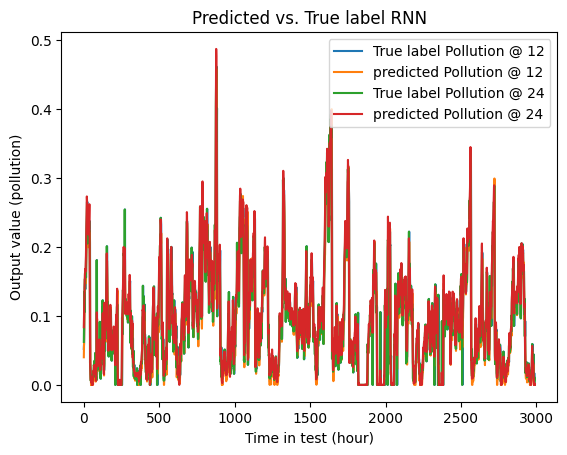

94/94 [==============================] - 1s 3ms/step


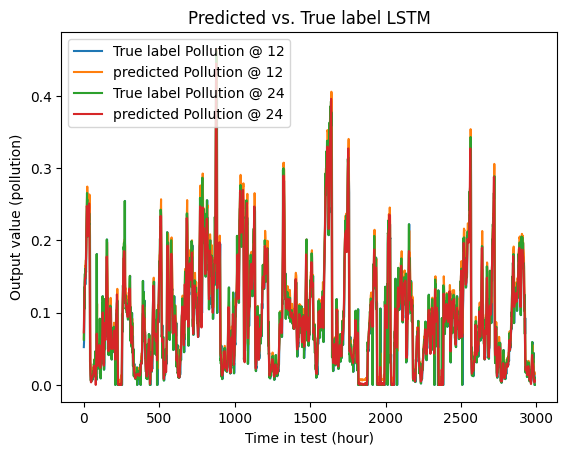

94/94 [==============================] - 0s 2ms/step


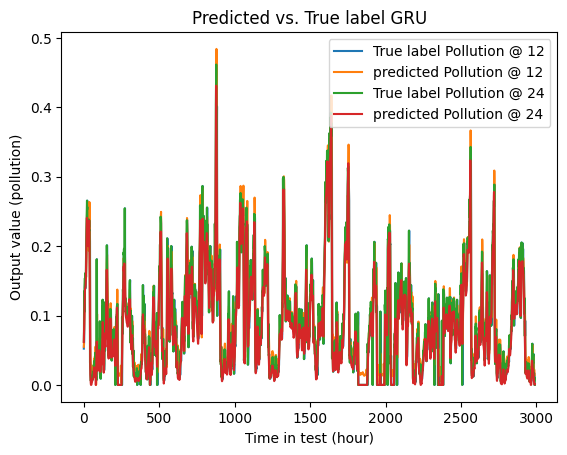

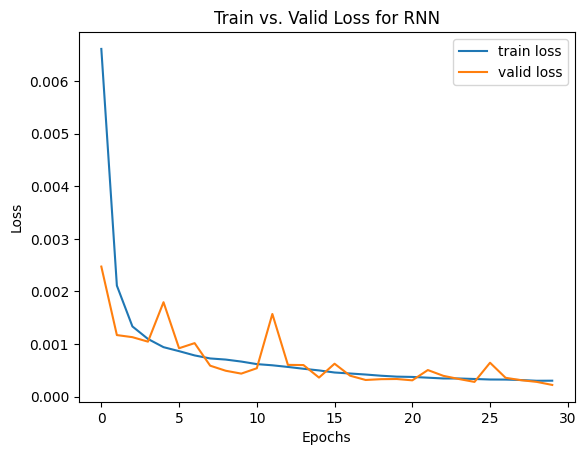

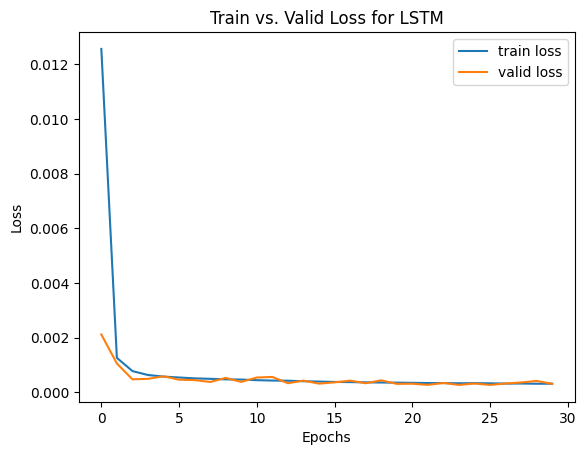

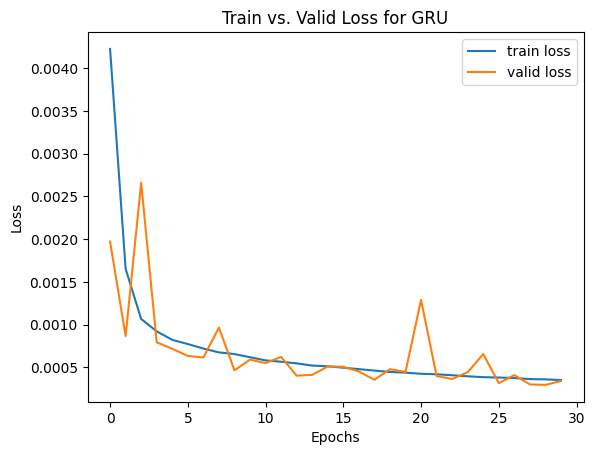

learning time for RNN :  26.106971210999973
learning time for LSTM :  87.32749853199994
learning time for GRU :  83.13886262400024


In [28]:
import numpy as np
import pandas as pd
import random
import math
from scipy.spatial import distance
import statistics
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU, SimpleRNN
from keras.optimizers import RMSprop
import timeit

dataset = np.load('/content/gdrive/MyDrive/polution_dataSet.npy')
train = dataset[:12000, ]
test = dataset[12000:15000, ]

vector1 = []
vector2 = []
vector3 = []
vector4 = []
vector5 = []
vector6 = []
vector7 = []
vector8 = []

for i in range(12000):
    vector1.append(train[i, 0])
    vector2.append(train[i, 1])
    vector3.append(train[i, 2])
    vector4.append(train[i, 3])
    vector5.append(train[i, 4])
    vector6.append(train[i, 5])
    vector7.append(train[i, 6])
    vector8.append(train[i, 7])

rand_list1 = random.sample(range(1, 12000), 2400)
rand_list2 = random.sample(range(1, 12000), 2400)
rand_list3 = random.sample(range(1, 12000), 2400)
rand_list4 = random.sample(range(1, 12000), 2400)
rand_list5 = random.sample(range(1, 12000), 2400)
rand_list6 = random.sample(range(1, 12000), 2400)
rand_list7 = random.sample(range(1, 12000), 2400)
rand_list8 = random.sample(range(1, 12000), 2400)

for i in range(2400):
    vector1[rand_list1[i]] = np.nan
    vector2[rand_list2[i]] = np.nan
    vector3[rand_list3[i]] = np.nan
    vector4[rand_list4[i]] = np.nan
    vector5[rand_list5[i]] = np.nan
    vector6[rand_list6[i]] = np.nan
    vector7[rand_list7[i]] = np.nan
    vector8[rand_list8[i]] = np.nan

vector1 = pd.DataFrame(vector1)
vector2 = pd.DataFrame(vector2)
vector3 = pd.DataFrame(vector3)
vector4 = pd.DataFrame(vector4)
vector5 = pd.DataFrame(vector5)
vector6 = pd.DataFrame(vector6)
vector7 = pd.DataFrame(vector7)
vector8 = pd.DataFrame(vector8)

vector1 = vector1.interpolate()
vector2 = vector2.interpolate()
vector3 = vector3.interpolate()
vector4 = vector4.interpolate()
vector5 = vector5.interpolate()
vector6 = vector6.interpolate()
vector7 = vector7.interpolate()
vector8 = vector8.interpolate()

mse1 = mean_squared_error(vector1, train[:, 0])
mse2 = mean_squared_error(vector2, train[:, 1])
mse3 = mean_squared_error(vector3, train[:, 2])
mse4 = mean_squared_error(vector4, train[:, 3])
mse5 = mean_squared_error(vector5, train[:, 4])
mse6 = mean_squared_error(vector6, train[:, 5])
mse7 = mean_squared_error(vector7, train[:, 6])
mse8 = mean_squared_error(vector8, train[:, 7])

vector1 = np.array(vector1)
vector2 = np.array(vector2)
vector3 = np.array(vector3)
vector4 = np.array(vector4)
vector5 = np.array(vector5)
vector6 = np.array(vector6)
vector7 = np.array(vector7)
vector8 = np.array(vector8)
d1 = []
d2 = []
d3 = []
d4 = []
d5 = []
d6 = []
d7 = []
d8 = []
for i in range(12000):
    d1.append(vector1[i])
    d2.append(vector2[i])
    d3.append(vector3[i])
    d4.append(vector4[i])
    d5.append(vector5[i])
    d6.append(vector6[i])
    d7.append(vector7[i])
    d8.append(vector8[i])

train[:, 0] = d1
train[:, 1] = d2
train[:, 2] = d3
train[:, 3] = d4
train[:, 4] = d5
train[:, 5] = d6
train[:, 6] = d7
train[:, 7] = d8

mse1 = mean_squared_error(vector1, train[:, 0])
mse2 = mean_squared_error(vector2, train[:, 1])
print("mse - mean : ", mse1)
print("mse - median : ", mse2)


def data_for_training(data_s1, period1):
    a1 = np.arange(len(data_s1) - period1 + 1)
    data_list1 = []
    for i in range(len(a1)):
        sample_list = []
        for j in range(period1):
            value1 = data_s1[i + j]
            sample_list.append(value1)
        data_list1.append(sample_list)
        i = i + 11
    data_list1 = np.array(data_list1)
    return data_list1


window = 11

x_train = data_for_training(train, window)
x_train = np.array(x_train)
# print(x_train.shape)
y_train = np.zeros((len(x_train), 2))
for i in range(len(x_train) - 2):
    value1 = x_train[i + 1][0][0]
    value2 = x_train[i + 2][1][0]
    y_train[i][0] = value1
    y_train[i][1] = value2

x_train = x_train[:, :11, :]

x_test = data_for_training(test, window)
x_test = np.array(x_test)
y_test = np.zeros((len(x_test), 2))
for i in range(len(x_test) - 2):
    value1 = x_test[i + 1][0][0]
    value2 = x_test[i + 2][1][0]
    y_test[i][0] = value1
    y_test[i][1] = value2
x_test = x_test[:, :11, :]

''' Build model rnn'''
rnn = Sequential()
rnn.add(SimpleRNN(units=50, input_shape=x_train.shape[1:], activation="relu", recurrent_dropout=0.0))
rnn.add(Dense(2, activation='relu'))
rnn.compile(loss='mse', optimizer='RMSprop', metrics=['mae'])
rnn.summary()

''' Training rnn '''
start_rnn = timeit.default_timer()
history_rnn = rnn.fit(x_train, y_train, epochs=30, validation_split=0.2, verbose=1, batch_size=30)
end_rnn = timeit.default_timer()
''' Results rnn'''
results_train_rnn = rnn.evaluate(x_train, y_train)
results_test_rnn = rnn.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train_rnn[0], results_train_rnn[1]))
print('test loss: {}, test acc: {}'.format(results_test_rnn[0], results_test_rnn[1]))

''' Build model lstm '''
lstm = Sequential()
lstm.add(LSTM(50, batch_input_shape=(None, 11, 8), return_sequences=True, recurrent_dropout=0))
lstm.add(LSTM(50, return_sequences=False, recurrent_dropout=0))
lstm.add(Dense(2, activation='relu'))
lstm.compile(loss='mse', optimizer='RMSPROP', metrics=['mae'])
lstm.summary()

''' Training lstm '''
start_lstm = timeit.default_timer()
history_lstm = lstm.fit(x_train, y_train, epochs=30, validation_split=0.2, verbose=1, batch_size=30)
end_lstm = timeit.default_timer()
''' Results lstm'''
results_train_lstm = lstm.evaluate(x_train, y_train)
results_test_lstm = lstm.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train_lstm[0], results_train_lstm[1]))
print('test loss: {}, test acc: {}'.format(results_test_lstm[0], results_test_lstm[1]))

''' Build model gru'''
gru = Sequential()
gru.add(GRU(100, batch_input_shape=(None, 11, 8), recurrent_dropout=0))
gru.add(Dense(2, activation='relu'))
gru.compile(loss='mse', optimizer='RMSprop', metrics=['mae'])
gru.summary()

''' Training gru'''
start_gru = timeit.default_timer()
history_gru = gru.fit(x_train, y_train, epochs=30, validation_split=0.2, verbose=1, batch_size=30)
end_gru = timeit.default_timer()
''' Results gru'''
results_train_gru = gru.evaluate(x_train, y_train)
results_test_gru = gru.evaluate(x_test, y_test)

print('train loss: {}, train acc: {}'.format(results_train_gru[0], results_train_gru[1]))
print('test loss: {}, test acc: {}'.format(results_test_gru[0], results_test_gru[1]))

# plt.plot(history_rnn.history['loss'], label='rnn')
plt.plot(history_lstm.history['loss'], label='lstm')
plt.plot(history_gru.history['loss'], label='gru')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss')
plt.legend()
plt.show()

# plt.plot(history_rnn.history['val_loss'], label='rnn')
plt.plot(history_lstm.history['val_loss'], label='lstm')
plt.plot(history_gru.history['val_loss'], label='gru')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Test Loss')
plt.legend()
plt.show()

results_test_rnn = rnn.predict(x_test)
plt.plot(np.arange(len(results_test_rnn)), y_test[:, 0], label='True label Pollution @ 12')
plt.plot(np.arange(len(results_test_rnn)), results_test_rnn[:, 0], label='predicted Pollution @ 12')
plt.plot(np.arange(len(results_test_rnn)), y_test[:, 1], label='True label Pollution @ 24')
plt.plot(np.arange(len(results_test_rnn)), results_test_rnn[:, 1], label='predicted Pollution @ 24')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel('Time in test (hour)')
plt.ylabel('Output value (pollution)')
plt.title('Predicted vs. True label RNN')
plt.show()

results_test_lstm = lstm.predict(x_test)
plt.plot(np.arange(len(results_test_lstm)), y_test[:, 0], label='True label Pollution @ 12')
plt.plot(np.arange(len(results_test_lstm)), results_test_lstm[:, 0], label='predicted Pollution @ 12')
plt.plot(np.arange(len(results_test_lstm)), y_test[:, 1], label='True label Pollution @ 24')
plt.plot(np.arange(len(results_test_lstm)), results_test_lstm[:, 1], label='predicted Pollution @ 24')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel('Time in test (hour)')
plt.ylabel('Output value (pollution)')
plt.title('Predicted vs. True label LSTM')
plt.show()

results_test_gru = gru.predict(x_test)
plt.plot(np.arange(len(results_test_gru)), y_test[:, 0], label='True label Pollution @ 12')
plt.plot(np.arange(len(results_test_gru)), results_test_gru[:, 0], label='predicted Pollution @ 12')
plt.plot(np.arange(len(results_test_gru)), y_test[:, 1], label='True label Pollution @ 24')
plt.plot(np.arange(len(results_test_gru)), results_test_gru[:, 1], label='predicted Pollution @ 24')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel('Time in test (hour)')
plt.ylabel('Output value (pollution)')
plt.title('Predicted vs. True label GRU')
plt.show()

plt.plot(history_rnn.history['loss'], label='train loss')
plt.plot(history_rnn.history['val_loss'], label='valid loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs. Valid Loss for RNN')
plt.legend()
plt.show()
plt.plot(history_lstm.history['loss'], label='train loss')
plt.plot(history_lstm.history['val_loss'], label='valid loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs. Valid Loss for LSTM')
plt.legend()
plt.show()
plt.plot(history_gru.history['loss'], label='train loss')
plt.plot(history_gru.history['val_loss'], label='valid loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs. Valid Loss for GRU')
plt.legend()
plt.show()

print('learning time for RNN : ', end_rnn - start_rnn)
print('learning time for LSTM : ', end_lstm - start_lstm)
print('learning time for GRU : ', end_gru - start_gru)